<a href="https://colab.research.google.com/github/Akhya04/codsoft/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv('/content/fraudTrain.csv', header = 0)
df_test = pd.read_csv('/content/fraudTest.csv', header = 0)

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [5]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
561972,561972,2019-08-27 01:26:13,3531129874770000,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,8.78,Shelby,Mitchell,F,974 Cindy Stream,...,43.8065,-73.0882,5895.0,"Scientist, marine",1975-07-13,2d96dfb8db03994eec250d395dd8f682,1.346031e+09,44.440860,-74.000783,1.0
561973,561973,2019-08-27 01:27:11,4914700582394237,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,110.30,John,Williams,M,8929 Phillips Corners Suite 259,...,40.8496,-80.1381,4589.0,Bookseller,1956-05-01,b56533e8f159585a27b0e04983dd15a4,1.346031e+09,39.889695,-80.117419,0.0
561974,561974,2019-08-27 01:27:16,4128730454058057622,fraud_Goodwin-Nitzsche,grocery_pos,145.00,Monique,Martin,F,68276 Matthew Springs,...,31.3833,-95.0619,43.0,"Engineer, production",1949-10-04,408f87d5056ffa5904c5d3fbe3446e94,1.346031e+09,30.869713,-94.475705,0.0
561975,561975,2019-08-27 01:28:18,180049032966888,"fraud_Weimann, Kuhic and Beahan",shopping_pos,127.01,Michael,Flores,M,70761 Fitzpatrick Brooks Suite 631,...,46.4959,-90.4383,795.0,Television/film/video producer,1986-04-15,608b3c33659ef7c44c4d7bd9fa3ef1cb,1.346031e+09,45.958949,-90.247600,0.0
561976,561976,2019-08-27 01:28:53,4319584480204988982,"fraud_Lind, Huel and McClure",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_train.shape

(561977, 23)

In [7]:
df_test.shape

(507746, 23)

In [8]:
df_train.size

12925471

In [9]:
df_test.size

11678158

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561977 entries, 0 to 561976
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             561977 non-null  int64  
 1   trans_date_trans_time  561977 non-null  object 
 2   cc_num                 561977 non-null  int64  
 3   merchant               561977 non-null  object 
 4   category               561976 non-null  object 
 5   amt                    561976 non-null  float64
 6   first                  561976 non-null  object 
 7   last                   561976 non-null  object 
 8   gender                 561976 non-null  object 
 9   street                 561976 non-null  object 
 10  city                   561976 non-null  object 
 11  state                  561976 non-null  object 
 12  zip                    561976 non-null  float64
 13  lat                    561976 non-null  float64
 14  long                   561976 non-nu

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507746 entries, 0 to 507745
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             507746 non-null  int64  
 1   trans_date_trans_time  507746 non-null  object 
 2   cc_num                 507746 non-null  int64  
 3   merchant               507746 non-null  object 
 4   category               507746 non-null  object 
 5   amt                    507746 non-null  float64
 6   first                  507746 non-null  object 
 7   last                   507746 non-null  object 
 8   gender                 507746 non-null  object 
 9   street                 507746 non-null  object 
 10  city                   507746 non-null  object 
 11  state                  507746 non-null  object 
 12  zip                    507746 non-null  int64  
 13  lat                    507746 non-null  float64
 14  long                   507746 non-nu

In [12]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,561977.000000,5.619770e+05,561976.000000,561976.000000,561976.000000,561976.000000,5.619760e+05,5.619760e+05,561976.000000,561976.000000,561976.000000
mean,280988.000000,4.170076e+17,70.269639,48769.629657,38.533823,-90.210069,8.916122e+04,1.336777e+09,38.533312,-90.210346,0.005840
std,162228.930451,1.308543e+18,158.674004,26907.835668,5.073219,13.761235,3.031611e+05,5.819421e+06,5.106997,13.773456,0.076197
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,140494.000000,1.800365e+14,9.640000,26041.000000,34.668900,-96.790900,7.430000e+02,1.332003e+09,34.736400,-96.881111,0.000000
50%,280988.000000,3.520550e+15,47.410000,48154.000000,39.354300,-87.458100,2.456000e+03,1.337390e+09,39.362410,-87.406722,0.000000
75%,421482.000000,4.642255e+15,83.090000,72011.000000,41.894800,-80.138100,2.047800e+04,1.341752e+09,41.953184,-80.216072,0.000000
max,561976.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.346031e+09,67.510267,-66.956540,1.000000


In [13]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,507746.000000,5.077460e+05,507746.000000,507746.000000,507746.000000,507746.000000,5.077460e+05,5.077450e+05,507745.000000,507745.000000,507745.000000
mean,253872.500000,4.178733e+17,69.576769,48842.056782,38.541634,-90.230964,8.829962e+04,1.379981e+09,38.541265,-90.230723,0.004201
std,146573.789227,1.309879e+18,150.812577,26856.821537,5.061656,13.721704,3.006641e+05,4.894153e+06,5.095975,13.733413,0.064678
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,126936.250000,1.800429e+14,9.640000,26292.000000,34.668900,-96.809400,7.410000e+02,1.375608e+09,34.754126,-96.906608,0.000000
50%,253872.500000,3.521417e+15,47.410000,48174.000000,39.371600,-87.476900,2.408000e+03,1.379814e+09,39.376107,-87.444251,0.000000
75%,380808.750000,4.635331e+15,83.130000,72042.000000,41.894800,-80.175200,1.968500e+04,1.384634e+09,41.953774,-80.262836,0.000000
max,507745.000000,4.992346e+18,19364.910000,99921.000000,65.689900,-67.950300,2.906700e+06,1.387627e+09,66.679297,-66.952026,1.000000


In [14]:
df_train.isnull().values.any()

np.True_

In [15]:
df_test.isnull().values.any()

np.True_

In [16]:
df_train.count()

,0
Unnamed: 0,561977
trans_date_trans_time,561977
cc_num,561977
merchant,561977
category,561976
amt,561976
first,561976
last,561976
gender,561976
street,561976


In [17]:
df_test.count()

,0
Unnamed: 0,507746
trans_date_trans_time,507746
cc_num,507746
merchant,507746
category,507746
amt,507746
first,507746
last,507746
gender,507746
street,507746


In [18]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [19]:
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [20]:
df_combined.shape

(1069723, 23)

In [21]:
df_combined.size

24603629

In [22]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069723 entries, 0 to 507745
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1069723 non-null  int64  
 1   trans_date_trans_time  1069723 non-null  object 
 2   cc_num                 1069723 non-null  int64  
 3   merchant               1069723 non-null  object 
 4   category               1069722 non-null  object 
 5   amt                    1069722 non-null  float64
 6   first                  1069722 non-null  object 
 7   last                   1069722 non-null  object 
 8   gender                 1069722 non-null  object 
 9   street                 1069722 non-null  object 
 10  city                   1069722 non-null  object 
 11  state                  1069722 non-null  object 
 12  zip                    1069722 non-null  float64
 13  lat                    1069722 non-null  float64
 14  long                   1

In [23]:
df_combined.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)

In [24]:
df_combined.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0


DATA VISUALISATION

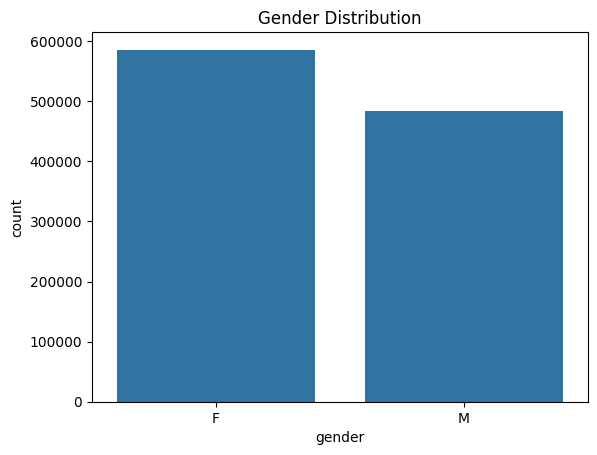

In [27]:
df_combined.reset_index(drop=True, inplace=True)

sns.countplot(x='gender', data=df_combined)
plt.title("Gender Distribution")
plt.show()

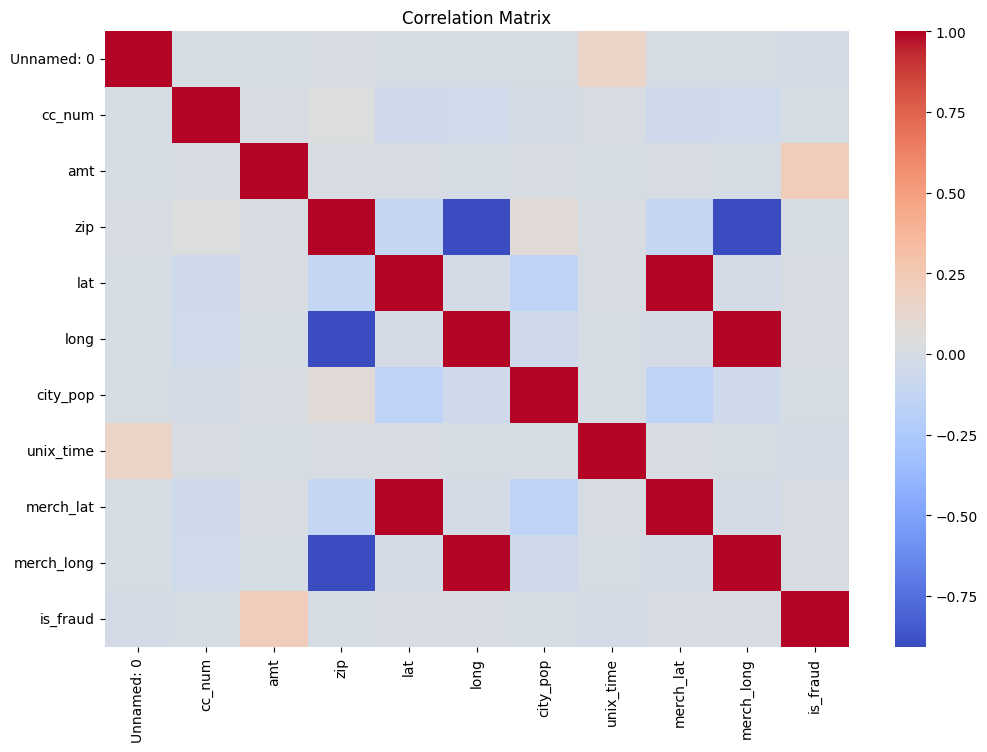

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df_combined = df_combined.select_dtypes(include=['number'])

correlation_matrix = numeric_df_combined.corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False)
plt.title("Correlation Matrix")
plt.show()

PREPROCESSING THE DATA

In [30]:
encoder = LabelEncoder()
new_col = encoder.fit_transform(df_combined["merchant"].values)
df_combined["merchant_new"] = new_col
df_combined.drop(labels = ["merchant"], axis = 1, inplace = True)


In [31]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(df_combined["category"].values)
df_combined["category_new"] = new_col1
df_combined.drop(labels = ["category"], axis = 1, inplace = True)

In [32]:
df_combined = pd.get_dummies(df_combined)
df_combined.drop(labels=['gender_F'], axis = 1, inplace = True)

In [33]:
df_combined.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2703186189652095,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,514,8,False
1,1,630423337322,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,241,4,False
2,2,38859492057661,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,390,0,True
3,3,3534093764340240,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,360,2,True
4,4,375534208663984,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,297,9,True


In [34]:
X = df_combined.drop("is_fraud", axis = 1)
y = df_combined["is_fraud"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAIN LOGISTIC REGRESSION MODEL

In [36]:
lr_model = LogisticRegression()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [39]:
lr_predictions = lr_model.predict(X_test)

In [40]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

Logistic Regression Model: 
[[14  6]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.57      0.80      0.67        10

    accuracy                           0.73        30
   macro avg       0.72      0.75      0.72        30
weighted avg       0.77      0.73      0.74        30

Accuracy:  0.7333333333333333


TRAIN DECISION TREE MODEL

In [41]:
dt_model = DecisionTreeClassifier()

In [42]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
dt_predictions = dt_model.predict(X_test)

In [44]:
print("Decision Tree Model: ")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print("Accuracy: ", accuracy_score(y_test, dt_predictions))

Decision Tree Model: 
[[11  9]
 [ 4  6]]
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30

Accuracy:  0.5666666666666667


TRAIN RANDOM FOREST MODEL

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
RandomForestClassifier(n_jobs=-1, random_state=42)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
rf_predictions = rf_model.predict(X_test)

In [49]:
print("Random Forest Model: ")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))

Random Forest Model: 
[[16  4]
 [ 5  5]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.56      0.50      0.53        10

    accuracy                           0.70        30
   macro avg       0.66      0.65      0.65        30
weighted avg       0.69      0.70      0.70        30

Accuracy:  0.7
